ISRC Python Workshop: Network analysis

__Network Analysis with NetworkX__

---

@author: Zhiya Zuo

@email: zhiya-zuo@uiowa.edu

---

In [1]:
import numpy as np
import pandas as pd

---

#### Introduction

Network analysis, though well developed through the area of physics, has been deep in various research fields inclduing economics, finance, computer science, biology, etc. In this workshop, we will cover basics to <a href='https://networkx.github.io/documentation/stable/', target='_blank'>___NetworkX___</a>.

Before that, I here introduce two other popular Python packages: <a href='http://igraph.org/python/doc/tutorial/tutorial.html', target='_blank'>___iGraph___</a> and <a href='https://graph-tool.skewed.de/static/doc/index.html', target='_blank'>___graph-tool___</a>. Note that the installation of the latter may be painful but has trememdous speedup compared to the other two. (On Mac, you can easily use <a href='https://brew.sh/' target='_blank'>Homebrew</a> to isntall it!)

<div class="mark">
Note that in the following, I will use the term __graph__ and __network__ interchangeably.</div><i class="fa fa-lightbulb-o "></i>

In [2]:
# first import the library
import networkx as nx

In [3]:
# check the version of NetworkX
nx.__version__

'3.0'

##### Get a network from scratch

Let's start with a brute-force approach of building a network. This will give an emptive graph:

In [4]:
G = nx.Graph()
print(nx.info(G))

AttributeError: module 'networkx' has no attribute 'info'

We can then start adding nodes/edges. 

_In some other areas, nodes are also called vertices; edges are called links._

In [ ]:
G.add_node(1) # add one node at a time
print(G.number_of_nodes())
G.add_nodes_from(range(2,5)) # add a list of nodes at once
print(G.number_of_nodes())

While we have something in our network now, we do not have any connections between them. After all, connectivity is the most interesting thing in networks!

In [5]:
G.add_edge(1, 2) # add one edge at a time
print(G.number_of_edges())
G.add_edges_from([(2, 3), (1, 4)]) # add a list of edges at once
print(G.number_of_edges())

1
3


We can now inspect what we have in our first network.

In [9]:
G.nodes()

NodeView((1, 2, 3, 4))

In [10]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 3)])

Degree is the number of connections a node has.

In [11]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 1, 4: 1})

In [12]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

<a id='sec22'></a>

##### Graph generators

Given specific parameters, we can ask __NetworkX__ to produce some ___random graphs___ for us. One of the use of random graphs is to compare the graph models to real data to see what are the differences/similarities between the two.

Reference:
> The Structure and Function of Complex Networks. M. E. J. Newman. SIAM Review 2003 45:2, 167-256

___NetworkX___ provides empirical network data for you to play with. We will be using <a href='https://en.wikipedia.org/wiki/Zachary%27s_karate_club' target='_blank'>Zachary's karate club</a> as an example here. 

In [31]:
karate = nx.karate_club_graph()

###### Erdos-Renyi random graph

This is a classic model for random graphs: given the number of nodes and probability of each possible edge formation, the model adds edges independently, also giving a tree like structure. 

In [32]:
n = karate.number_of_nodes() # number of nodes
p = 2.*karate.number_of_edges()/(n*(n-1)) # probability of edge creation (This is essentially the DENSITY of a network)

In [33]:
n, p

(34, 0.13903743315508021)

In [34]:
nx.density(karate)

0.13903743315508021

In [35]:
erdos_rg = nx.erdos_renyi_graph(n, p, seed=np.random.randint(10))

###### Configuration model

This model helps to preserve a given degree distribution (i.e., the distribution of the number of connections each node has)

In [36]:
degree_dist = np.asarray(list(dict(karate.degree()).values()))
degree_dist

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

In [37]:
conf_rg = nx.configuration_model(degree_dist, seed=np.random.randint(10))

Note: a `MultiGraph` can contain different types of edges and self loops. We convert it back to `Graph`

In [38]:
conf_rg = nx.Graph(conf_rg)

###### More...

As we mentioned above, we can leverage ___NetworkX___'s built-in datasets as toy data for practice or even in your research or even in your research or even in your research or even in your research. See <a href='https://networkx.github.io/documentation/stable/reference/generators.html' target='_blank'>here</a> for more details.

---

#### Visualization

Note that we will need ___Matplotlib___ for visualization using ___NetworkX___. If you have not installed it, run `pip install matplotlib` in your terminal. If you use __Anaconda__, you are good to go.

In [39]:
import matplotlib.pyplot as plt # import the dependent library

The following line is a notebook magic command to draw figures ___inline___.

In [27]:
%matplotlib inline

every time we run this, it'll show us a different layout

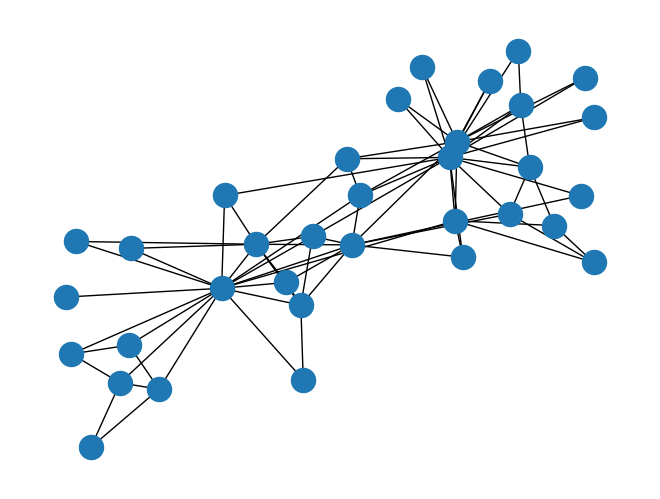

In [28]:
nx.draw(karate)

Not bad, right? But! We want to make it better, start by adding node labels.

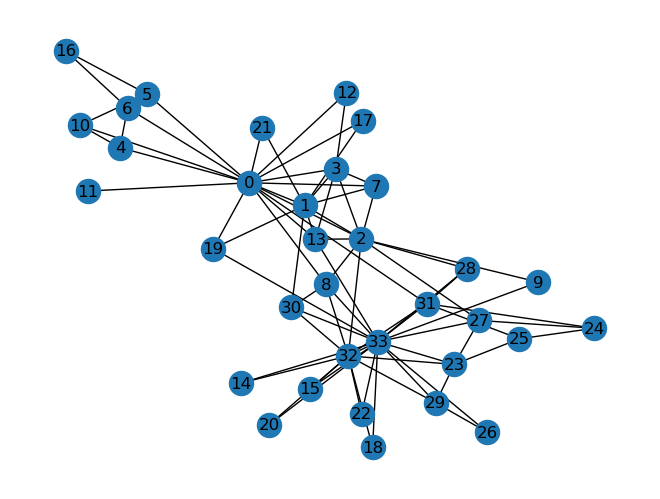

In [29]:
nx.draw(karate, with_labels=True)

We can choose what layouts we want: consult <a href='https://networkx.github.io/documentation/stable/reference/drawing.html' target='_blank'>here</a> for more information.

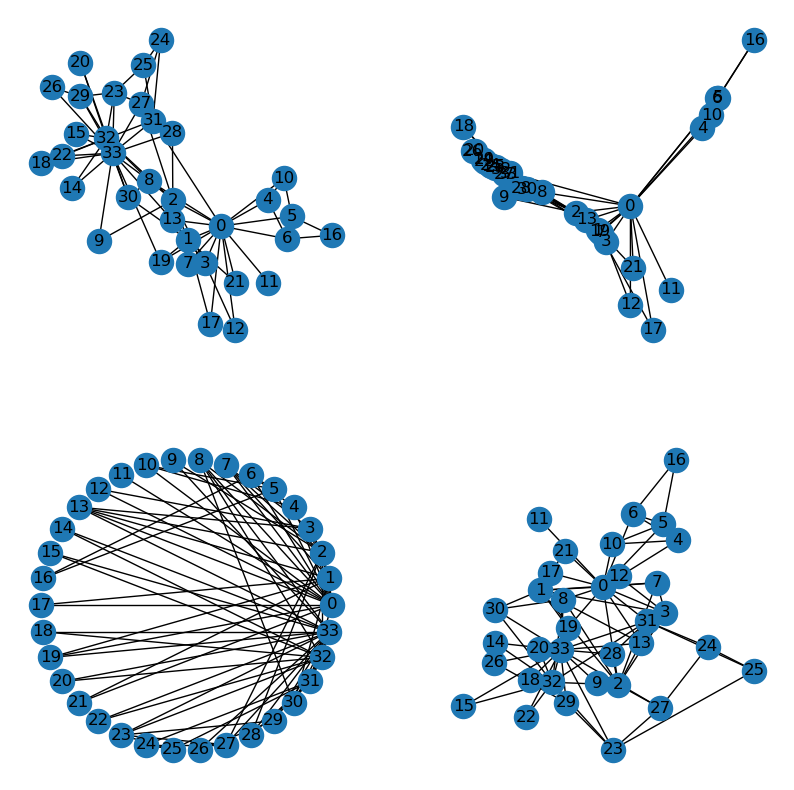

In [30]:
plt.figure(figsize=(10,10))
# plt.subplot() will create "sub-plots" in one canvas
# Now we are telling matplotlib to give us a 2x2 subplot canvas
plt.subplot(221)  # first subplot
nx.draw_spring(karate, with_labels=True)
plt.subplot(222) # second subplot
nx.draw_spectral(karate, with_labels=True)
plt.subplot(223) # third subplot
nx.draw_circular(karate, with_labels=True)
plt.subplot(224) # last subplot
nx.draw_kamada_kawai(karate, with_labels=True)

---

#### Network statistics

There are many useful functions to calculate network stats for you.

##### Global level stats

In [40]:
print('Density:', nx.density(karate))

Density: 0.13903743315508021


In [41]:
print('Avg. shortest path length:', nx.average_shortest_path_length(karate))

Avg. shortest path length: 2.408199643493761


In [42]:
print('Avg. clustering coefficient:', nx.average_clustering(karate))

Avg. clustering coefficient: 0.5706384782076823


In [43]:
print('Assortativity', nx.degree_assortativity_coefficient(karate))

Assortativity -0.47561309768461413


Combining these with [Section 2.2](#sec22), we can play with some comparison between the synthesized and real network stats. A common routine is that we repeat the construction of random graphs over and over again to obtain the average values to decrease bias from the randomness.

Let's use `list` to save the stats:

In [44]:
erdos_assortativity_list = list()
conf_assortativity_list = list()

In [45]:
n = karate.number_of_nodes() # number of nodes
p = 2.*karate.number_of_edges()/(n*n-1) # probability of edge creation (This is essentially the DENSITY of a network)

In [46]:
degree_dist = np.asarray(list(dict(karate.degree()).values()))
degree_dist

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

In [47]:
for i in range(100): # randomly sample random graphs 100 times
    erdos_rg = nx.erdos_renyi_graph(n, p, seed=np.random.randint(10))
    conf_rg = nx.Graph(nx.configuration_model(degree_dist, seed=np.random.randint(10))) # convert `MultiGraph` to `Graph`
    # calculate assortativity
    erdos_assortativity_list.append(nx.degree_assortativity_coefficient(erdos_rg))
    conf_assortativity_list.append(nx.degree_assortativity_coefficient(conf_rg))

In [48]:
print('Erdos-Renyi assortativity:', np.mean(erdos_assortativity_list), np.std(erdos_assortativity_list, ddof=1))
print('Conf. model assortativity:', np.mean(conf_assortativity_list), np.std(conf_assortativity_list, ddof=1))
print('Real network value:', nx.degree_assortativity_coefficient(karate))

Erdos-Renyi assortativity: -0.04845883292526445 0.06721321259830554
Conf. model assortativity: -0.12616157687716878 0.08156392318006367
Real network value: -0.47561309768461413


Now you see that there's a much higher tendency of the low degree nodes (mostly members) in ___karate club network___ to connect with high degree nodes (mostly leaders). We can then interpret that there may be a core-periphery or leader-member structure. (_We cannot be sure about this from this very simple approach though!_)

##### Local level

We can look at micro-level network stats by giving some nodes of interest.

In [49]:
karate.degree(1) # degree of one node

9

In [50]:
karate.degree([1,2]) # degree of a list of nodes

DegreeView({1: 9, 2: 10})

In [51]:
nx.shortest_path(karate, 1, 9) # one of the shortest path from node 1 to node 9

[1, 2, 9]

---

#### Conclusion

There are definitely a lot more to explore. In closing, I list a few topics that may be of interest but may not be covered due to time limit.

P.S.: <a href='https://icon.colorado.edu/#!/networks' target='_blank'>Index of Complex Networks</a> is a good place to find more network data.

---

##### Community detection

Naturally, we want to know if there are groups/clusters of nodes in a network. Well seperated networks may indicate some emergent patterns within the nodes.

For simplicity, we will again use ___karate___

In [58]:
karate = nx.karate_club_graph()

There are several algorithms available in ___NetworkX___. Let us try the famous
<a href='https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman' target='_blank'>Girvan–Newman method</a>.

Reference:
> Girvan M. and Newman M. E. J., Community structure in social and biological networks, Proc. Natl. Acad. Sci. USA 99, 7821–7826 (2002)

In [59]:
comm = list(nx.community.girvan_newman(karate))

It is a hierarchical partition. Let's get the 1st partition.

In [60]:
comm[0]

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

We can now update our visualization by adding colors based on community partition. 

In [61]:
layout = nx.fruchterman_reingold_layout(karate) # positions for all nodes

We can realize this by plotting nodes seperately.

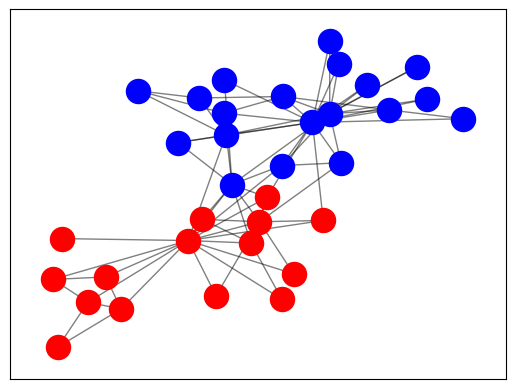

In [62]:
# 1st community
nx.draw_networkx_nodes(karate, layout, nodelist=comm[0][0],
                       node_color='r')
# 2nd community
nx.draw_networkx_nodes(karate, layout, nodelist=comm[0][1],
                       node_color='b')
# draw edges
nx.draw_networkx_edges(karate, layout, width=1.0, alpha=0.5)